In [1]:
# 수요량, 생산량
# http://www.keaj.kr/news/articleView.html?idxno=5324

In [2]:
import pandas as pd

df=pd.read_csv("./data/02_시간별 제주 전력수요량.csv", encoding="UTF-8" )
df

,거래일자,1시,2시,3시,4시,5시,6시,7시,8시,9시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
0,2007-01-01,422.037,398.037,380.637,368.775,370.051,372.159,374.676,361.026,341.567,...,336.214,343.124,350.981,375.544,394.203,394.240,388.124,387.212,413.658,422.529
1,2007-01-02,397.819,374.159,358.701,348.422,348.996,362.357,369.187,372.940,382.285,...,382.423,382.390,386.971,413.192,439.721,432.768,425.605,416.936,435.161,438.139
2,2007-01-03,410.473,385.102,368.481,358.802,360.899,369.266,378.414,382.822,387.433,...,394.064,395.911,404.583,426.010,438.461,432.950,421.157,407.550,430.667,434.811
3,2007-01-04,406.087,380.251,364.197,355.552,358.710,366.111,374.988,379.917,382.947,...,386.480,385.895,387.390,413.372,433.645,428.572,417.667,410.505,431.918,436.340
4,2007-01-05,408.738,384.298,365.598,355.323,357.527,367.703,376.722,377.281,385.651,...,390.343,386.563,387.705,408.761,433.896,427.326,419.900,411.197,432.102,436.708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5474,2021-12-27,795.565,766.598,745.062,731.373,734.156,750.933,785.346,839.692,921.427,...,854.699,876.264,919.317,971.357,967.330,943.942,904.943,854.130,831.539,817.607
5475,2021-12-28,775.204,737.272,723.113,709.159,705.909,715.858,742.821,796.769,875.307,...,842.396,866.657,895.729,932.662,945.606,920.643,891.916,852.842,831.829,810.699
5476,2021-12-29,759.632,721.621,694.682,677.916,676.162,690.471,720.439,774.759,863.323,...,744.514,769.111,834.212,910.393,923.483,909.364,884.106,849.510,829.506,816.749
5477,2021-12-30,769.900,737.756,720.559,714.821,717.600,733.441,772.252,827.038,859.254,...,735.557,792.917,869.889,948.544,956.465,929.741,898.672,854.470,836.455,826.697


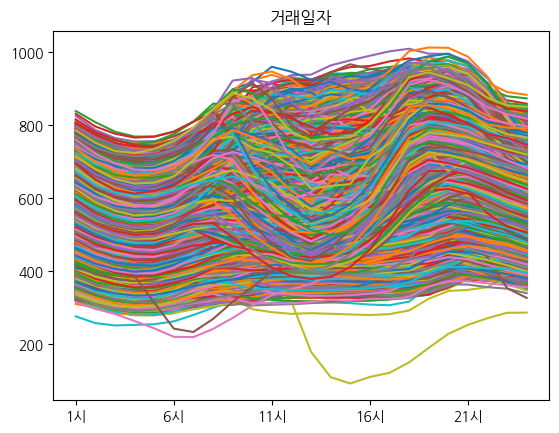

In [5]:
import koreanize_matplotlib

df.set_index("거래일자").T.plot()
# 제목 설정
import matplotlib.pyplot as plt
plt.title("거래일자")
# 범례 없애기
plt.legend().remove()

In [6]:
df.max()

거래일자    2021-12-31
1시          838.17
2시          807.62
3시         781.552
4시         768.125
5시         768.536
6시         781.961
7시         809.228
8시         858.098
9시         921.427
10시        936.137
11시        959.258
12시        945.747
13시        937.777
14시        962.947
15시        976.823
16시         989.45
17시       1001.457
18시       1008.638
19시       1012.095
20시       1011.108
21시        987.044
22시        932.147
23시        890.012
24시        882.484
dtype: object

In [7]:
df.min()

거래일자    2007-01-01
1시         276.048
2시          257.57
3시         251.146
4시         252.646
5시           243.3
6시           220.0
7시           219.2
8시         241.535
9시          271.57
10시        295.867
11시        287.521
12시        282.916
13시          179.1
14시          109.7
15시           92.3
16시        110.117
17시          121.5
18시         149.88
19시        189.686
20시        228.034
21시        252.705
22시        271.039
23시        285.823
24시        286.251
dtype: object

Text(0.5, 1.0, '시간별 전력수요량')

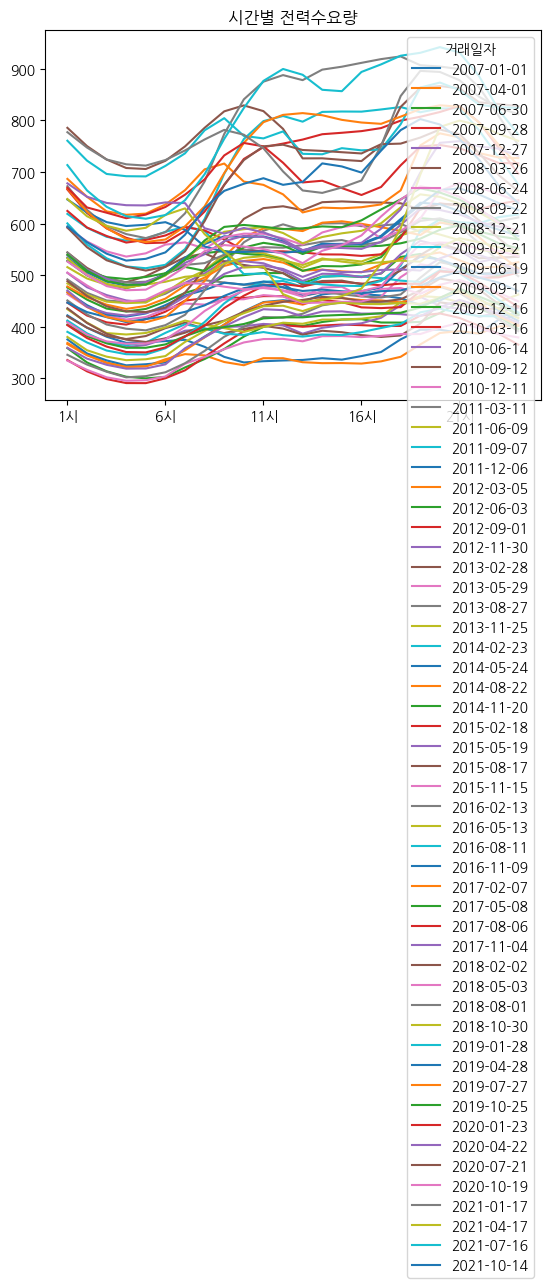

In [9]:
# 30일치 데이터만 선택
df=pd.read_csv("./data/02_시간별 제주 전력수요량.csv", encoding="UTF-8" )
df=df.iloc[::90]
df.set_index("거래일자").T.plot()
plt.title("시간별 전력수요량")

In [10]:
df=pd.read_csv("./data/02_시간별 제주 전력수요량.csv", encoding="UTF-8" )
df["1시"]

0       422.037
1       397.819
2       410.473
3       406.087
4       408.738
         ...   
5474    795.565
5475    775.204
5476    759.632
5477    769.900
5478    785.526
Name: 1시, Length: 5479, dtype: float64

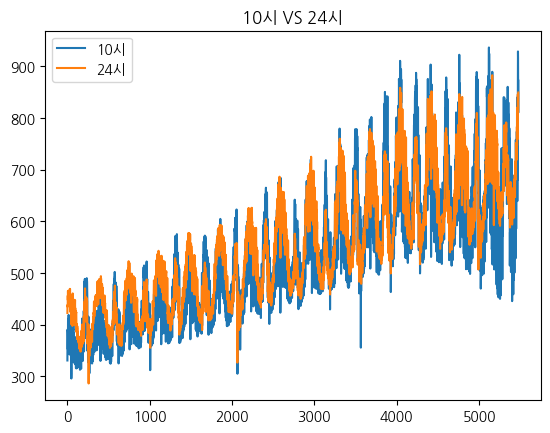

In [11]:
plt.plot(df["10시"].values, label="10시")
plt.plot(df["24시"].values, label="24시")
plt.legend()
plt.title("10시 VS 24시")
plt.show()

In [12]:
# 딥러닝으로 예측하기
df = pd.read_csv("./data/02_시간별 제주 전력수요량.csv", encoding="UTF-8" )
df
# sum 합 열 생성
df["sum"] = df.sum( axis = 1, numeric_only=True)
df

,거래일자,1시,2시,3시,4시,5시,6시,7시,8시,9시,...,16시,17시,18시,19시,20시,21시,22시,23시,24시,sum
0,2007-01-01,422.037,398.037,380.637,368.775,370.051,372.159,374.676,361.026,341.567,...,343.124,350.981,375.544,394.203,394.240,388.124,387.212,413.658,422.529,8867.927
1,2007-01-02,397.819,374.159,358.701,348.422,348.996,362.357,369.187,372.940,382.285,...,382.390,386.971,413.192,439.721,432.768,425.605,416.936,435.161,438.139,9416.134
2,2007-01-03,410.473,385.102,368.481,358.802,360.899,369.266,378.414,382.822,387.433,...,395.911,404.583,426.010,438.461,432.950,421.157,407.550,430.667,434.811,9534.414
3,2007-01-04,406.087,380.251,364.197,355.552,358.710,366.111,374.988,379.917,382.947,...,385.895,387.390,413.372,433.645,428.572,417.667,410.505,431.918,436.340,9450.037
4,2007-01-05,408.738,384.298,365.598,355.323,357.527,367.703,376.722,377.281,385.651,...,386.563,387.705,408.761,433.896,427.326,419.900,411.197,432.102,436.708,9444.459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5474,2021-12-27,795.565,766.598,745.062,731.373,734.156,750.933,785.346,839.692,921.427,...,876.264,919.317,971.357,967.330,943.942,904.943,854.130,831.539,817.607,20361.640
5475,2021-12-28,775.204,737.272,723.113,709.159,705.909,715.858,742.821,796.769,875.307,...,866.657,895.729,932.662,945.606,920.643,891.916,852.842,831.829,810.699,19737.034
5476,2021-12-29,759.632,721.621,694.682,677.916,676.162,690.471,720.439,774.759,863.323,...,769.111,834.212,910.393,923.483,909.364,884.106,849.510,829.506,816.749,18809.413
5477,2021-12-30,769.900,737.756,720.559,714.821,717.600,733.441,772.252,827.038,859.254,...,792.917,869.889,948.544,956.465,929.741,898.672,854.470,836.455,826.697,19156.315


In [13]:
# 데이터 전처리 : Min-Max 정규화 하기
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_cols = ['1시', '2시', '3시', '4시', '5시', '6시', '7시', '8시', '9시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시', '24시', 'sum']
df_scaled = scaler.fit_transform(df[scale_cols])
df = pd.DataFrame(df_scaled, columns=scale_cols)

In [14]:
df

,1시,2시,3시,4시,5시,6시,7시,8시,9시,10시,...,16시,17시,18시,19시,20시,21시,22시,23시,24시,sum
0,0.259711,0.255371,0.244136,0.225284,0.241322,0.270764,0.263506,0.193802,0.107711,0.054477,...,0.264982,0.260787,0.262780,0.248680,0.212248,0.184409,0.175725,0.211581,0.228565,0.183505
1,0.216627,0.211961,0.202779,0.185800,0.201235,0.253322,0.254203,0.213125,0.170368,0.139221,...,0.309636,0.301686,0.306620,0.304028,0.261449,0.235450,0.220686,0.247171,0.254746,0.221256
2,0.239138,0.231855,0.221217,0.205937,0.223897,0.265616,0.269841,0.229153,0.178290,0.147761,...,0.325012,0.321701,0.321546,0.302495,0.261682,0.229393,0.206488,0.239733,0.249164,0.229401
3,0.231336,0.223036,0.213140,0.199632,0.219730,0.260002,0.264035,0.224441,0.171387,0.145097,...,0.313622,0.302162,0.306829,0.296640,0.256091,0.224640,0.210958,0.241803,0.251729,0.223591
4,0.236052,0.230394,0.215782,0.199188,0.217477,0.262835,0.266974,0.220166,0.175548,0.138846,...,0.314381,0.302520,0.301460,0.296945,0.254500,0.227681,0.212005,0.242108,0.252346,0.223207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5474,0.924207,0.925421,0.931204,0.928703,0.934544,0.944786,0.959524,0.970147,1.000000,0.987983,...,0.871282,0.906655,0.956587,0.945568,0.914228,0.888197,0.881991,0.903221,0.891189,0.975005
5475,0.887985,0.872106,0.889822,0.885609,0.880764,0.882371,0.887451,0.900531,0.929031,0.967500,...,0.860357,0.879849,0.911528,0.919153,0.884475,0.870458,0.880042,0.903701,0.879602,0.931993
5476,0.860283,0.843652,0.836220,0.825000,0.824129,0.837195,0.849517,0.864833,0.910590,0.912031,...,0.749425,0.809940,0.885596,0.892253,0.870071,0.859822,0.875002,0.899856,0.889749,0.868113
5477,0.878549,0.872986,0.885007,0.896593,0.903023,0.913659,0.937332,0.949624,0.904328,0.802764,...,0.776498,0.850484,0.930022,0.932357,0.896093,0.879658,0.882505,0.911357,0.906434,0.892002


In [15]:
# Define the new column names as a dictionary
new_column_names = {"날짜": "Date", 1: "1", 2: "2", 3: "3", 4: "4", 5: "5", 6: "6", 7: "7", 8: "8", 9: "9", 10: "10", 11: "11", 12: "12", 13: "13", 14: "14", 15: "15", 16: "16", 17: "17", 18: "18", 19: "19", 20: "20", 21: "21", 22: "22", 23: "23", 24: "24"}

# 열 이름 변경 
df.rename(columns=new_column_names, inplace=True)

In [28]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

# feature은 30일치, target은 다음날 1일치 전력 수요량
# 데이터 클래스 생성
class DemandDataset(Dataset):
    def __init__(self, df):
        self.data = df
        self.x = self.data.iloc[:, -1].values
    def __len__(self):
        return len(self.data)-365
    def __getitem__(self, idx):
        return self.x[idx:idx+365], self.x[idx+365]

In [29]:
dataset = DemandDataset(df)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, drop_last=True)

In [30]:
for i in dataloader:
    print(i)
    break

[tensor([[0.5232, 0.4965, 0.4780,  ..., 0.5609, 0.5307, 0.5650],
        [0.4682, 0.4794, 0.4641,  ..., 0.4556, 0.4854, 0.4878],
        [0.4198, 0.3958, 0.3888,  ..., 0.4228, 0.4509, 0.4616],
        ...,
        [0.5607, 0.5475, 0.5595,  ..., 0.6246, 0.5586, 0.5093],
        [0.5632, 0.5861, 0.6132,  ..., 0.6881, 0.6401, 0.6545],
        [0.2289, 0.2323, 0.2215,  ..., 0.2590, 0.2536, 0.2630]],
       dtype=torch.float64), tensor([0.5357, 0.5182, 0.4540, 0.2154, 0.2544, 0.7740, 0.5008, 0.4210, 0.7300,
        0.8178, 0.6364, 0.4720, 0.3214, 0.3093, 0.3165, 0.4353, 0.2305, 0.2118,
        0.5529, 0.4976, 0.3229, 0.4026, 0.4868, 0.2911, 0.1957, 0.3076, 0.6090,
        0.4397, 0.3008, 0.5425, 0.7029, 0.2700], dtype=torch.float64)]


In [31]:
import torch
import torch.nn as nn
from sklearn.metrics import r2_score

class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(input_size=365, hidden_size=30, num_layers=2, batch_first=True)
        self.fc = nn.Linear(30, 1)

    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x[:, -1])
        return x

model = RNN()
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.01)

def compute_r2_score(y_true, y_pred):
    return r2_score(y_true.detach().cpu().numpy(), y_pred.detach().cpu().numpy())

for epoch in range(200):
    for i, (x, y) in enumerate(dataloader):
        optimizer.zero_grad()
        output = model(x.unsqueeze(1).float())
        loss = criterion(output.squeeze(), y.float())
        loss.backward()
        optimizer.step()

    if epoch % 10 == 0:
        y_true = y.float().unsqueeze(1)  
        y_pred = model(x.unsqueeze(1).float())  
        r2 = compute_r2_score(y_true, y_pred.squeeze())

        print(f"Epoch {epoch}: Loss: {loss}, R-squared: {r2}")


Epoch 0: Loss: 0.024409644305706024, R-squared: 0.0007691701585295085
Epoch 10: Loss: 0.03249816969037056, R-squared: -0.01423898879522345
Epoch 20: Loss: 0.001836007577367127, R-squared: 0.9360046319430431
Epoch 30: Loss: 0.0012194159207865596, R-squared: 0.9629939810847041
Epoch 40: Loss: 0.0006281710229814053, R-squared: 0.9611521408609324
Epoch 50: Loss: 0.0007948369020596147, R-squared: 0.9577618796331213
Epoch 60: Loss: 0.000748157559428364, R-squared: 0.9764080444385402
Epoch 70: Loss: 0.001517355558462441, R-squared: 0.9579482543025227
Epoch 80: Loss: 0.0009975560242310166, R-squared: 0.9852137459030486
Epoch 90: Loss: 0.0017220366280525923, R-squared: 0.9548589878833609
Epoch 100: Loss: 0.0018701909575611353, R-squared: 0.9541000390367906
Epoch 110: Loss: 0.0013498752377927303, R-squared: 0.9619361173610897
Epoch 120: Loss: 0.0022313520312309265, R-squared: 0.9073764905749626
Epoch 130: Loss: 0.0016471705166622996, R-squared: 0.9595122487628935
Epoch 140: Loss: 0.0015845955349

In [32]:
# 모델 저장
torch.save(model, "./model/model2.pth")

In [33]:
# 모델 예측
model = torch.load("./model/model2.pth")
model.eval()

# 예측 데이터 생성
pred = []
for i in range(len(dataset)):
    x, y = dataset[i]
    output = model(torch.tensor(x).unsqueeze(0).unsqueeze(1).float())
    pred.append(output.squeeze().detach().numpy())
    
# 예측 데이터 합치기
pred = np.array(pred).reshape(-1, 1)
pred = np.concatenate([np.zeros((365, 1)), pred])
# 예측 데이터 저장
df["예측"] = pred

In [34]:
df[["sum","예측"]].to_csv("test.csv")

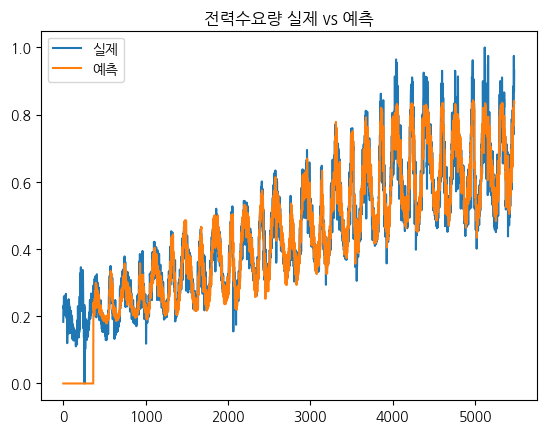

In [35]:
# 실제와 예측 데이터 그리기
plt.plot(df["sum"], label="실제")
plt.plot(df["예측"], label="예측")
plt.legend()
plt.title("전력수요량 실제 vs 예측")
plt.show()

In [36]:
df

,1시,2시,3시,4시,5시,6시,7시,8시,9시,10시,...,17시,18시,19시,20시,21시,22시,23시,24시,sum,예측
0,0.259711,0.255371,0.244136,0.225284,0.241322,0.270764,0.263506,0.193802,0.107711,0.054477,...,0.260787,0.262780,0.248680,0.212248,0.184409,0.175725,0.211581,0.228565,0.183505,0.000000
1,0.216627,0.211961,0.202779,0.185800,0.201235,0.253322,0.254203,0.213125,0.170368,0.139221,...,0.301686,0.306620,0.304028,0.261449,0.235450,0.220686,0.247171,0.254746,0.221256,0.000000
2,0.239138,0.231855,0.221217,0.205937,0.223897,0.265616,0.269841,0.229153,0.178290,0.147761,...,0.321701,0.321546,0.302495,0.261682,0.229393,0.206488,0.239733,0.249164,0.229401,0.000000
3,0.231336,0.223036,0.213140,0.199632,0.219730,0.260002,0.264035,0.224441,0.171387,0.145097,...,0.302162,0.306829,0.296640,0.256091,0.224640,0.210958,0.241803,0.251729,0.223591,0.000000
4,0.236052,0.230394,0.215782,0.199188,0.217477,0.262835,0.266974,0.220166,0.175548,0.138846,...,0.302520,0.301460,0.296945,0.254500,0.227681,0.212005,0.242108,0.252346,0.223207,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5474,0.924207,0.925421,0.931204,0.928703,0.934544,0.944786,0.959524,0.970147,1.000000,0.987983,...,0.906655,0.956587,0.945568,0.914228,0.888197,0.881991,0.903221,0.891189,0.975005,0.821111
5475,0.887985,0.872106,0.889822,0.885609,0.880764,0.882371,0.887451,0.900531,0.929031,0.967500,...,0.879849,0.911528,0.919153,0.884475,0.870458,0.880042,0.903701,0.879602,0.931993,0.838548
5476,0.860283,0.843652,0.836220,0.825000,0.824129,0.837195,0.849517,0.864833,0.910590,0.912031,...,0.809940,0.885596,0.892253,0.870071,0.859822,0.875002,0.899856,0.889749,0.868113,0.838017
5477,0.878549,0.872986,0.885007,0.896593,0.903023,0.913659,0.937332,0.949624,0.904328,0.802764,...,0.850484,0.930022,0.932357,0.896093,0.879658,0.882505,0.911357,0.906434,0.892002,0.840765


In [39]:
data = list(df["sum"].values)
len(data)

5479

(0.0, 1.0)

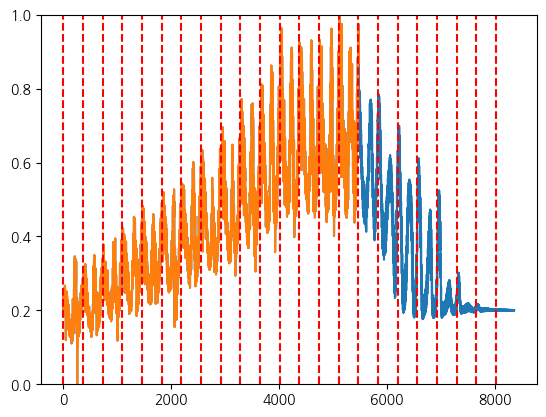

In [42]:
# 앞으로의 값도 계속 예측하기
data = list(df["sum"].values)
for i in range(8000):
    x = data[0+i:i+365]
    output = model(torch.tensor(x).unsqueeze(0).unsqueeze(1).float())
    if i>=5114:
        data.append(output.squeeze().detach().numpy().item())
    
plt.plot(data)
plt.plot(df["sum"], label="실제")

for i in range(0, len(data), 365):
    plt.axvline(x=i, color="r", linestyle="--")
plt.ylim(0, 1)

In [ ]:
# MinMax 되돌리는 코드 